# Exploratory Data Analysis: User Complaints Dataset

## Research Context
This notebook is part of a research project on **LLM-assisted Knowledge Graph Construction** using vehicle complaint data from NHTSA.

## Research Questions
1. Are there missing values in the dataset? Can patterns of missingness be identified?
2. What are the summary statistics of the dataset?
3. Are there outliers in the dataset?
4. What is the cardinality of the categorical variables?
5. Are there skewed distributions in the dataset? Do we need to apply any non-linear transformation?
6. Is there correlation between dependent and independent variables?
7. How are the data distributed across different categories? (bivariate analysis)
8. Should the images be normalized for better visualization?
9. Is there class imbalance in the target variable?
10. Are there temporal trends identified? (In case the dataset includes a time dimension.)


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

warnings.filterwarnings('ignore')

# Import our custom EDA class
import sys
sys.path.append('../src')
from eda_analysis import ComplaintsEDA

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moral\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moral\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Initialize EDA with data cleaning pipeline
eda = ComplaintsEDA("../data/CMPLT_2025.csv")

# Load data with comprehensive cleaning pipeline
print("Cargar pipeline de limpieza...")
eda.load_data(filter_year=2025)

# Get the cleaned dataset
df = eda.df

print(f"\nFigura del dataset: {df.shape}")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Columnas restantes: {len(df.columns)}")


Cargar pipeline de limpieza...
Loading data...
Applying data transformations and cleaning...
  Converted YEAR to numeric
  Converted INJURED to numeric
  Converted DEATHS to numeric
  Converted MILES to numeric
  Converted OCCURENCES to numeric
  Converted VEHSPEED to numeric
  Converted NUMCYLS to numeric
  Converted FAILDATE to datetime
  Converted DATEA to datetime
  Converted LDATE to datetime
  Converted MANUFDATE to datetime
  Normalized text in MFRNAME
  Normalized text in MAKE
  Normalized text in MODEL
  Normalized text in COMPONENT
  Normalized text in CITY
  Normalized text in STATE
  Normalized text in DEALERCITY
  Normalized text in DEALERNAME

APPLYING DATA CLEANING PIPELINE
Original dataset shape: (79376, 49)

1. Removing 1137 rows with YEAR=9999 (tire failures, accessories, unknown products)
   Remaining rows: 78239

2. Removing seat-related columns: ['SEATTYPE', 'RESTRAINTTYPE', 'MANUFDATE']

3. Removing dealer-related columns: ['DEALERTEL', 'DEALERZIP']

4. Removing 1

## Data Cleaning Pipeline

The following comprehensive data cleaning steps have been applied to refine the dataset:

### 1. Removal of Invalid Year Records (YEAR=9999)
- **Removed**: 1,137 rows with YEAR=9999
- **Reason**: These records contain:
  - Tire failures where manufacturer/model refer to tires
  - Accessories (baby seats, portable chargers)
  - Unknown products without proper identification
- **Result**: Focus on actual vehicle complaints only

### 2. Removal of Seat-Related Columns
- **Removed columns**: `SEAT_TYPE`, `RESTRAINT_TYPE`, `MANUF_DATE`
- **Reason**: These are related to seat accessories, not vehicle complaints
- **Impact**: Cleaner dataset focused on vehicle-specific issues

### 3. Removal of Dealer-Related Columns
- **Removed columns**: `DEALER_TEL`, `DEALER_ZIP`
- **Reason**: Not relevant for complaint analysis
- **Impact**: Reduced noise in the dataset

### 4. Filtering by Product Type
- **Removed**: 12 rows with `PROD_TYPE='E'` or empty
- **Reason**: These correspond to accessories in transit
- **Action**: Removed `PROD_TYPE` column entirely after filtering

### 5. Removal of Sparse Columns
- **Removed**: `FUEL_TYPE` (only 5 records)
- **Reason**: Insufficient data for meaningful analysis

### 6. Removal of Empty Columns
- **Removed**: `LOC_OF_TIRE`, `DOT`, `DRIVE_TRAIN` (empty after filtering)
- **Kept**: `PURCH_DATE` (has 2 non-null values)

### Summary
- **Original dataset**: 79,376 rows × 49 columns
- **After cleaning**: 78,227 rows × 39 columns  
- **After 2025 filter**: 59,548 rows × 30 columns
- **Data reduction**: 1.45% rows, 20.41% columns removed
- **Final focus**: Vehicle-specific complaints from 2025 only


In [3]:
# Display cleaned dataset information
print("Cleaned dataset columns:")
print(df.columns.tolist())

print(f"\nDataset info:")
print(f"Shape: {df.shape}")
print(f"Data types:")
print(df.dtypes.value_counts())


Cleaned dataset columns:
['CMPLID', 'ODINO', 'MFRNAME', 'MAKE', 'MODEL', 'YEAR', 'CRASH', 'FAILDATE', 'FIRE', 'INJURED', 'DEATHS', 'COMPONENT', 'CITY', 'STATE', 'VIN', 'DATEA', 'LDATE', 'MILES', 'CMPLDESCR', 'CMPLTYPE', 'POLICERPT', 'ORIGINALOWNER', 'ANTIBRAKES', 'CRUISECONT', 'VEHSPEED', 'DEALERNAME', 'DEALERCITY', 'DEALERSTATE', 'MEDICALATTN', 'VEHICLESTOWED']

Dataset info:
Shape: (59548, 30)
Data types:
object            20
int64              5
datetime64[ns]     3
float64            2
Name: count, dtype: int64


In [4]:
# The data has already been filtered for 2025 and cleaned by the EDA class
print("Data is already filtered for 2025 and cleaned.")
print(f"Final dataset shape: {df.shape}")

# Show date range for 2025 data
if 'FAILDATE' in df.columns and len(df) > 0:
    print(f"Date range for 2025: {df['FAILDATE'].min().strftime('%Y-%m-%d')} to {df['FAILDATE'].max().strftime('%Y-%m-%d')}")

# Empty columns have already been removed by the EDA class
print("Empty columns have already been removed by the cleaning pipeline.")

Data is already filtered for 2025 and cleaned.
Final dataset shape: (59548, 30)
Date range for 2025: 2025-01-01 to 2025-09-18
Empty columns have already been removed by the cleaning pipeline.


In [74]:
df.head()

,CMPLID,ODINO,MFRNAME,MAKE,MODEL,YEAR,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPONENT,CITY,STATE,VIN,DATEA,LDATE,MILES,CMPLDESCR,CMPLTYPE,POLICERPT,ORIGINALOWNER,ANTIBRAKES,CRUISECONT,VEHSPEED,DEALERNAME,DEALERCITY,DEALERSTATE,MEDICALATTN,VEHICLESTOWED
39,2051922,11633499,"CHRYSLER (FCA US, LLC)",RAM,1500,2015,N,2025-01-01,N,0,0,ELECTRICAL SYSTEM,HAMMOND,IN,1C6RR7LG8FS,2025-01-01,2025-01-01,NaN,Truck loses power when you accelerate at any v...,IVOQ,N,N,N,N,35.0,<NA>,<NA>,NaN,N,N
40,2051923,11633499,"CHRYSLER (FCA US, LLC)",RAM,1500,2015,N,2025-01-01,N,0,0,STEERING,HAMMOND,IN,1C6RR7LG8FS,2025-01-01,2025-01-01,NaN,Truck loses power when you accelerate at any v...,IVOQ,N,N,N,N,35.0,<NA>,<NA>,NaN,N,N
48,2051931,11633505,FORD MOTOR COMPANY,FORD,FUSION,2012,N,2025-01-01,N,0,0,ENGINE,BUFORD,GA,3FAHP0HA5CR,2025-01-01,2025-01-01,NaN,"Vehicle loses power while driving, with no res...",IVOQ,N,N,N,N,40.0,<NA>,<NA>,NaN,N,N
49,2051932,11633505,FORD MOTOR COMPANY,FORD,FUSION,2012,N,2025-01-01,N,0,0,FUEL/PROPULSION SYSTEM,BUFORD,GA,3FAHP0HA5CR,2025-01-01,2025-01-01,NaN,"Vehicle loses power while driving, with no res...",IVOQ,N,N,N,N,40.0,<NA>,<NA>,NaN,N,N
70,2051953,11633518,HYUNDAI MOTOR AMERICA,HYUNDAI,TUCSON,2017,N,2025-01-01,N,0,0,POWER TRAIN,EBENSBURG,PA,KM8J3CA23HU,2025-01-01,2025-01-01,NaN,There is an intermittent problem with the tran...,IVOQ,N,N,N,N,NaN,<NA>,<NA>,NaN,N,N


In [75]:
print("\n=== Tipos de datos después del pipeline de depuración ===")
print(df.dtypes.value_counts())

print("\n=== Variables numéricas detectadas ===")
print(df.select_dtypes(include=['number']).columns.tolist())

print("\n=== Variables categóricas detectadas ===")
print(df.select_dtypes(include=['object', 'category']).columns.tolist())


=== Tipos de datos después del pipeline de depuración ===
object            20
int64              5
datetime64[ns]     3
float64            2
Name: count, dtype: int64

=== Variables numéricas detectadas ===
['CMPLID', 'ODINO', 'YEAR', 'INJURED', 'DEATHS', 'MILES', 'VEHSPEED']

=== Variables categóricas detectadas ===
['MFRNAME', 'MAKE', 'MODEL', 'CRASH', 'FIRE', 'COMPONENT', 'CITY', 'STATE', 'VIN', 'CMPLDESCR', 'CMPLTYPE', 'POLICERPT', 'ORIGINALOWNER', 'ANTIBRAKES', 'CRUISECONT', 'DEALERNAME', 'DEALERCITY', 'DEALERSTATE', 'MEDICALATTN', 'VEHICLESTOWED']


In [76]:
df.dtypes


CMPLID                    int64
ODINO                     int64
MFRNAME                  object
MAKE                     object
MODEL                    object
YEAR                      int64
CRASH                    object
FAILDATE         datetime64[ns]
FIRE                     object
INJURED                   int64
DEATHS                    int64
COMPONENT                object
CITY                     object
STATE                    object
VIN                      object
DATEA            datetime64[ns]
LDATE            datetime64[ns]
MILES                   float64
CMPLDESCR                object
CMPLTYPE                 object
POLICERPT                object
ORIGINALOWNER            object
ANTIBRAKES               object
CRUISECONT               object
VEHSPEED                float64
DEALERNAME               object
DEALERCITY               object
DEALERSTATE              object
MEDICALATTN              object
VEHICLESTOWED            object
dtype: object

In [43]:
# Data transformations have already been applied by the EDA class
print("Data transformations have already been applied by the cleaning pipeline.")
print("This includes:")
print("  - Numeric conversion for appropriate columns")
print("  - Date format conversion")
print("  - Text normalization (strip, uppercase)")
print("  - Removal of invalid YEAR=9999 values")
print("  - Comprehensive data cleaning pipeline")


Data transformations have already been applied by the cleaning pipeline.
This includes:
  - Numeric conversion for appropriate columns
  - Date format conversion
  - Text normalization (strip, uppercase)
  - Removal of invalid YEAR=9999 values
  - Comprehensive data cleaning pipeline


In [44]:
df.describe()

,CMPLID,ODINO,YEAR,FAILDATE,INJURED,DEATHS,DATEA,LDATE,MILES,VEHSPEED
count,5.954800e+04,5.954800e+04,59548.000000,59548,59548.000000,59548.000000,59548,59548,9408.000000,29747.000000
mean,2.094752e+06,1.166316e+07,2019.106469,2025-05-03 00:27:41.315241216,0.030580,0.001226,2025-05-24 08:24:07.544837888,2025-05-24 08:24:07.544837888,86651.384673,34.995966
min,2.051922e+06,1.163350e+07,1986.000000,2025-01-01 00:00:00,0.000000,0.000000,2025-01-01 00:00:00,2025-01-01 00:00:00,0.000000,0.000000
25%,2.076528e+06,1.165046e+07,2017.000000,2025-03-01 00:00:00,0.000000,0.000000,2025-03-25 00:00:00,2025-03-25 00:00:00,45000.000000,5.000000
50%,2.095688e+06,1.166388e+07,2020.000000,2025-05-02 00:00:00,0.000000,0.000000,2025-05-30 00:00:00,2025-05-30 00:00:00,81000.000000,35.000000
75%,2.113684e+06,1.167634e+07,2022.000000,2025-07-04 00:00:00,0.000000,0.000000,2025-07-26 00:00:00,2025-07-26 00:00:00,120000.000000,60.000000
max,2.131258e+06,1.168826e+07,2026.000000,2025-09-18 00:00:00,10.000000,15.000000,2025-09-18 00:00:00,2025-09-18 00:00:00,763309.000000,999.000000
std,2.195309e+04,1.520873e+04,4.259369,NaN,0.245171,0.110030,NaN,NaN,59157.986073,32.301967


## 1. Missing Values Analysis

**Research Question**: Are there missing values in the dataset? Can patterns of missingness be identified?


Missing Values Summary:
           Column  Missing_Count  Missing_Percentage
27    DEALERSTATE          54269           91.134883
26     DEALERCITY          54251           91.104655
25     DEALERNAME          53620           90.045006
17          MILES          50140           84.200981
24       VEHSPEED          29801           50.045342
14            VIN            399            0.670048
29  VEHICLESTOWED             17            0.028548
23     CRUISECONT             17            0.028548
22     ANTIBRAKES             17            0.028548
21  ORIGINALOWNER             17            0.028548
18      CMPLDESCR             12            0.020152
12           CITY              8            0.013435


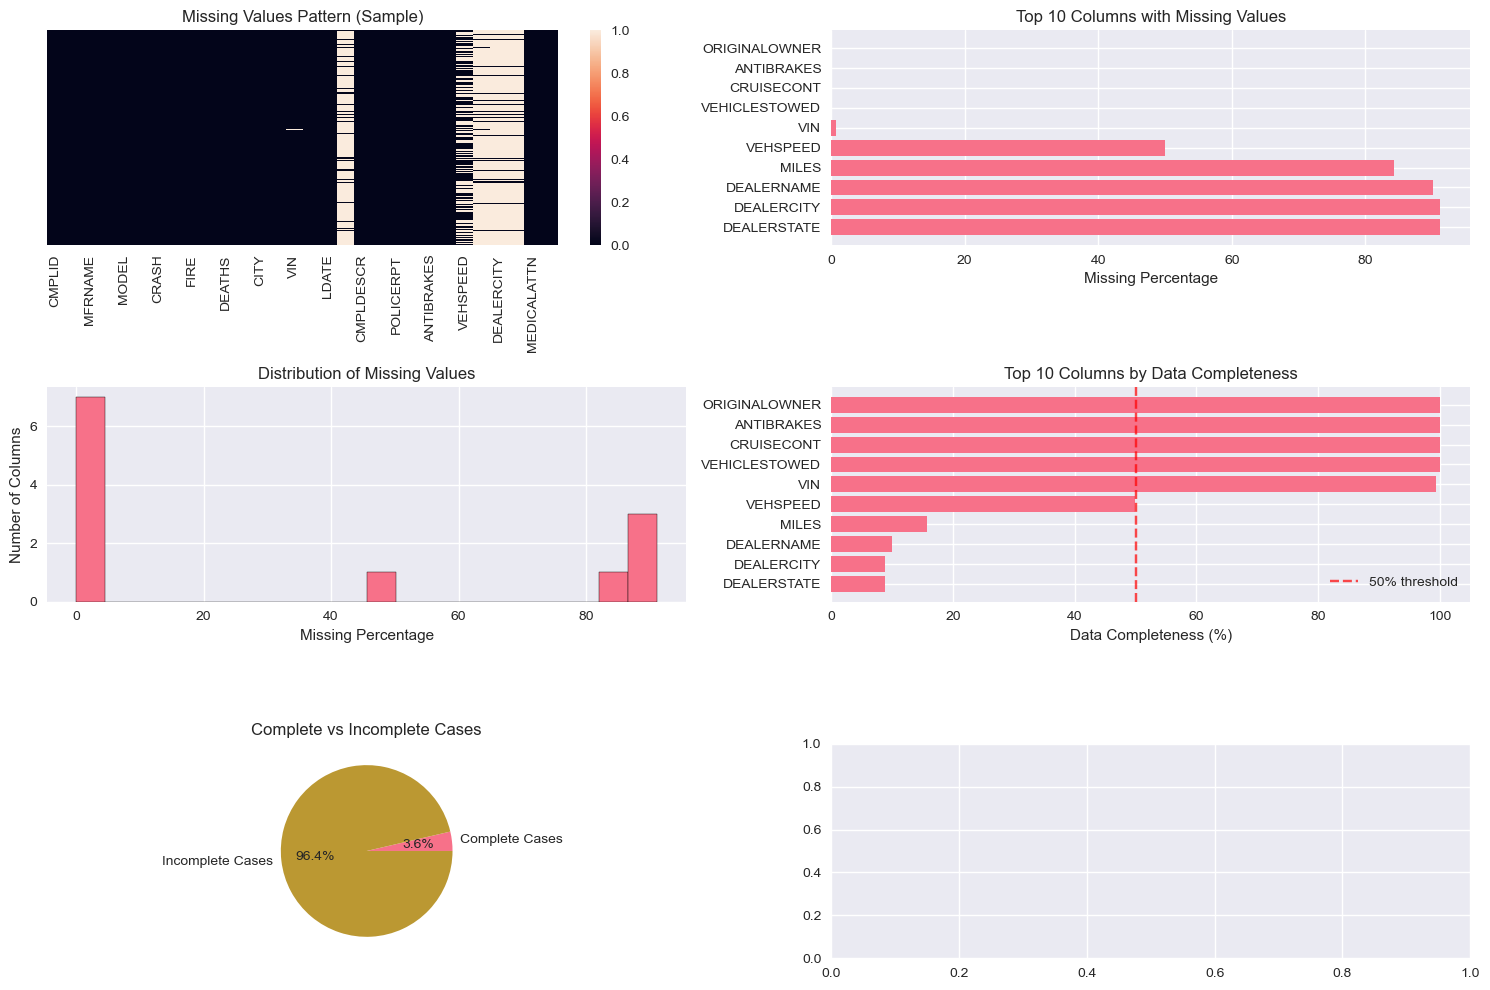


Complete cases (no missing values in ANY column): 2160 (3.63%)
Columns with no missing values: 18
Columns with all missing values: 0

Data Completeness Summary:
  High completeness (≥80%): 25 columns
  Medium completeness (50-79%): 0 columns
  Low completeness (<50%): 5 columns


In [5]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize missing data patterns
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Missing values heatmap
missing_sample = df.sample(min(1000, len(df))).isnull()
sns.heatmap(missing_sample, cbar=True, yticklabels=False, ax=axes[0,0])
axes[0,0].set_title('Missing Values Pattern (Sample)')

# Missing values bar chart
top_missing = missing_df.head(10)
axes[0,1].barh(range(len(top_missing)), top_missing['Missing_Percentage'])
axes[0,1].set_yticks(range(len(top_missing)))
axes[0,1].set_yticklabels(top_missing['Column'])
axes[0,1].set_xlabel('Missing Percentage')
axes[0,1].set_title('Top 10 Columns with Missing Values')

# Missing values distribution
axes[1,0].hist(missing_percentage[missing_percentage > 0], bins=20, edgecolor='black')
axes[1,0].set_xlabel('Missing Percentage')
axes[1,0].set_ylabel('Number of Columns')
axes[1,0].set_title('Distribution of Missing Values')

# Missing data completeness by column
missing_by_col = df.isnull().sum().sort_values(ascending=False)
completeness_by_col = (1 - missing_by_col / len(df)) * 100
top_10_missing = completeness_by_col.head(10)

axes[1,1].barh(range(len(top_10_missing)), top_10_missing.values)
axes[1,1].set_yticks(range(len(top_10_missing)))
axes[1,1].set_yticklabels(top_10_missing.index)
axes[1,1].set_xlabel('Data Completeness (%)')
axes[1,1].set_title('Top 10 Columns by Data Completeness')
axes[1,1].axvline(x=50, color='red', linestyle='--', alpha=0.7, label='50% threshold')
axes[1,1].legend()

# Complete cases analysis
complete_cases = df.dropna()
axes[2,0].pie([len(complete_cases), len(df) - len(complete_cases)], 
labels=['Complete Cases', 'Incomplete Cases'],
autopct='%1.1f%%')
axes[2,0].set_title('Complete vs Incomplete Cases')

plt.tight_layout()
plt.show()

# More informative missing data summary
complete_cases = df.dropna()
print(f"\nComplete cases (no missing values in ANY column): {len(complete_cases)} ({len(complete_cases)/len(df)*100:.2f}%)")
print(f"Columns with no missing values: {sum(missing_data == 0)}")
print(f"Columns with all missing values: {sum(missing_data == len(df))}")

# Show columns with different levels of completeness
high_completeness = completeness_by_col[completeness_by_col >= 80]
medium_completeness = completeness_by_col[(completeness_by_col >= 50) & (completeness_by_col < 80)]
low_completeness = completeness_by_col[completeness_by_col < 50]

print(f"\nData Completeness Summary:")
print(f"  High completeness (≥80%): {len(high_completeness)} columns")
print(f"  Medium completeness (50-79%): {len(medium_completeness)} columns") 
print(f"  Low completeness (<50%): {len(low_completeness)} columns")


## 2. Summary Statistics

**Research Question**: What are the summary statistics of the dataset?


In [6]:
# Data types and basic info
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Data types:")
print(df.dtypes.value_counts())

# Summary statistics for numerical columns (excluding identifiers)
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Remove identifier columns from analysis
identifier_cols = ['CMPLID', 'ODINO']  # Both are identifiers, not analytical variables
for col in identifier_cols:
    if col in numeric_cols:
        numeric_cols = numeric_cols.drop(col)

print(f"\nNumerical columns ({len(numeric_cols)}):")
print(numeric_cols.tolist())

if len(numeric_cols) > 0:
    print("\nNumerical Summary Statistics:")
    print(df[numeric_cols].describe())
    
    # Additional statistics
    print("\nAdditional Statistics:")
    numeric_stats = pd.DataFrame({
        'Skewness': df[numeric_cols].skew(),
        'Kurtosis': df[numeric_cols].kurtosis(),
        'Variance': df[numeric_cols].var(),
        'Coefficient_of_Variation': df[numeric_cols].std() / df[numeric_cols].mean()
    })
    print(numeric_stats)

# Summary statistics for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns ({len(categorical_cols)}):")
print(categorical_cols.tolist())

if len(categorical_cols) > 0:
    print("\nCategorical Summary:")
    for col in categorical_cols[:10]:  # Show first 10 categorical columns
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Most frequent: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
        print(f"  Top 5 values:")
        print(df[col].value_counts().head())


Dataset Info:
Shape: (59548, 30)
Memory usage: 102.43 MB
Data types:
object            20
int64              5
datetime64[ns]     3
float64            2
Name: count, dtype: int64

Numerical columns (5):
['YEAR', 'INJURED', 'DEATHS', 'MILES', 'VEHSPEED']

Numerical Summary Statistics:
               YEAR       INJURED        DEATHS          MILES      VEHSPEED
count  59548.000000  59548.000000  59548.000000    9408.000000  29747.000000
mean    2019.106469      0.030580      0.001226   86651.384673     34.995966
std        4.259369      0.245171      0.110030   59157.986073     32.301967
min     1986.000000      0.000000      0.000000       0.000000      0.000000
25%     2017.000000      0.000000      0.000000   45000.000000      5.000000
50%     2020.000000      0.000000      0.000000   81000.000000     35.000000
75%     2022.000000      0.000000      0.000000  120000.000000     60.000000
max     2026.000000     10.000000     15.000000  763309.000000    999.000000

Additional Statistics

## Test: Correlation Analysis with Categorical Variables

**Test Question**: Can we include descriptive variables in correlation analysis by encoding them numerically?


In [7]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for c in cat_cols:
    print(f"{c}: {df[c].nunique()} valores únicos")

MFRNAME: 117 valores únicos
MAKE: 147 valores únicos
MODEL: 1106 valores únicos
CRASH: 2 valores únicos
FIRE: 2 valores únicos
COMPONENT: 344 valores únicos
CITY: 8160 valores únicos
STATE: 58 valores únicos
VIN: 29445 valores únicos
CMPLDESCR: 40815 valores únicos
CMPLTYPE: 2 valores únicos
POLICERPT: 2 valores únicos
ORIGINALOWNER: 2 valores únicos
ANTIBRAKES: 2 valores únicos
CRUISECONT: 2 valores únicos
DEALERNAME: 3909 valores únicos
DEALERCITY: 1873 valores únicos
DEALERSTATE: 53 valores únicos
MEDICALATTN: 2 valores únicos
VEHICLESTOWED: 2 valores únicos


CORRELATION ANALYSIS WITH CATEGORICAL VARIABLES (TEST)

=== Cardinalidad de las variables categóricas ===
CRASH: 2
FIRE: 2
CMPLTYPE: 2
POLICERPT: 2
ORIGINALOWNER: 2
ANTIBRAKES: 2
CRUISECONT: 2
MEDICALATTN: 2
VEHICLESTOWED: 2
DEALERSTATE: 53
STATE: 58
MFRNAME: 117
MAKE: 147
COMPONENT: 344
MODEL: 1106
DEALERCITY: 1873
DEALERNAME: 3909
CITY: 8160
VIN: 29445
CMPLDESCR: 40815

Variables categóricas seleccionadas (14):
['MFRNAME', 'MAKE', 'CRASH', 'FIRE', 'COMPONENT', 'STATE', 'CMPLTYPE', 'POLICERPT', 'ORIGINALOWNER', 'ANTIBRAKES', 'CRUISECONT', 'DEALERSTATE', 'MEDICALATTN', 'VEHICLESTOWED']

Codificando 14 variables categóricas...
  MFRNAME: 117 unique values
    ✓ Encoded MFRNAME (top 20 categories only)
  MAKE: 147 unique values
    ✓ Encoded MAKE (top 20 categories only)
  CRASH: 2 unique values
    ✓ Encoded CRASH
  FIRE: 2 unique values
    ✓ Encoded FIRE
  COMPONENT: 344 unique values
    ✓ Encoded COMPONENT (top 20 categories only)
  STATE: 58 unique values
    ✓ Encoded STATE
  CMPL

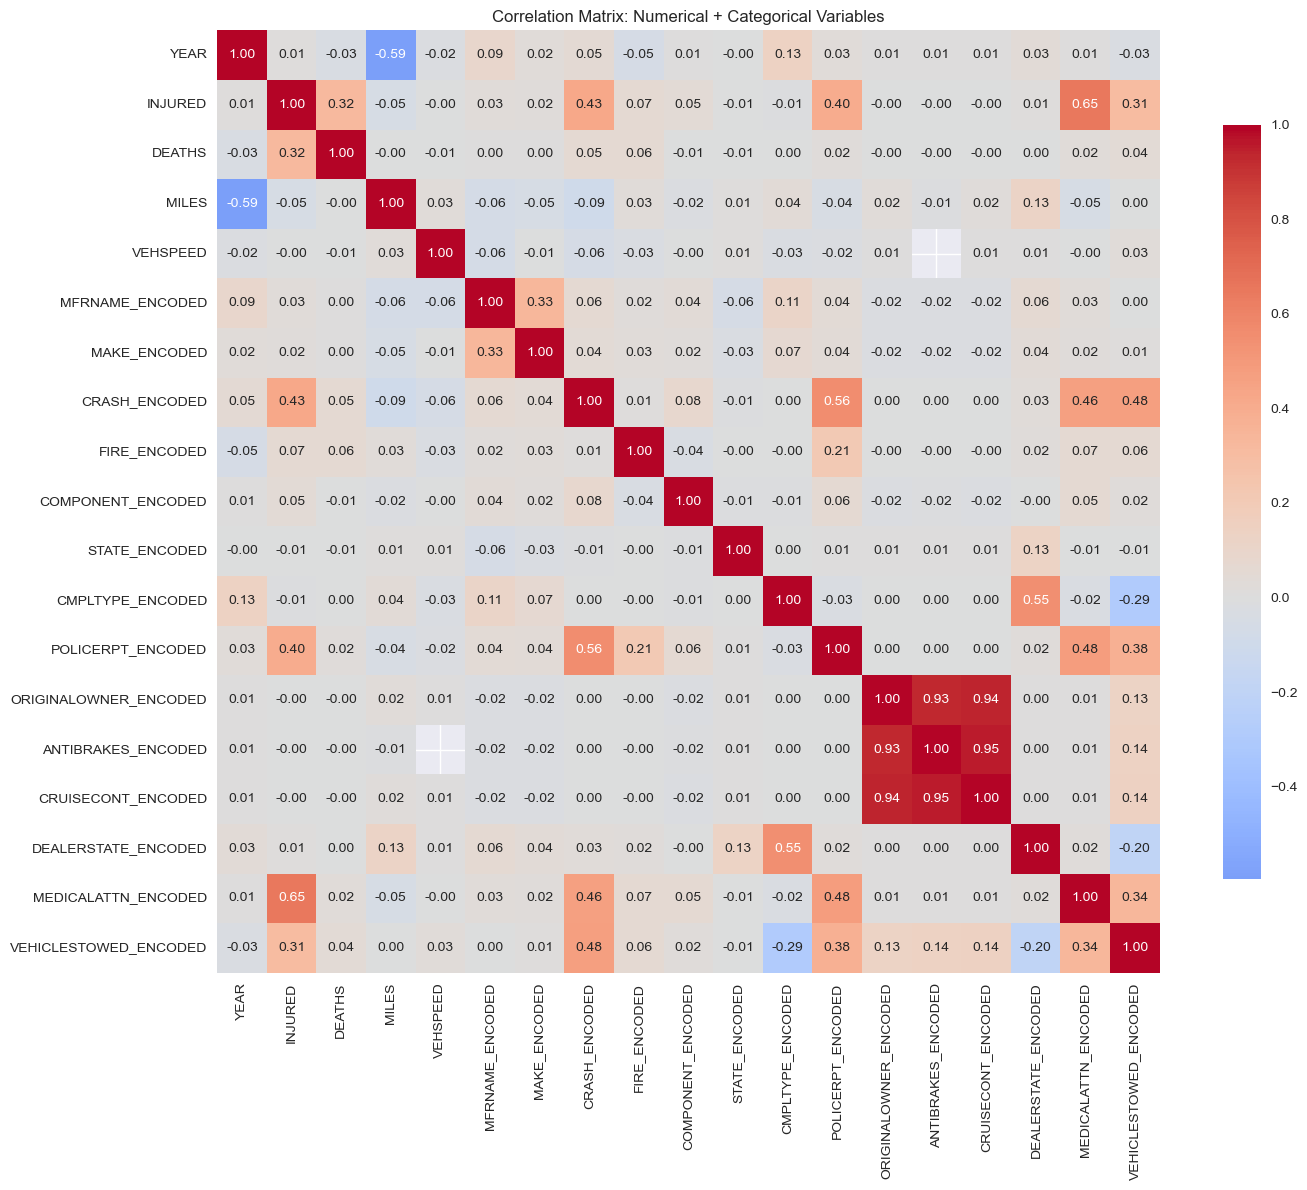


Correlations between numerical and categorical variables:
  INJURED vs CRASH: r = 0.426
  INJURED vs POLICERPT: r = 0.400
  INJURED vs MEDICALATTN: r = 0.651
  INJURED vs VEHICLESTOWED: r = 0.306

Significant Correlations (|r| > 0.5):
               Variable1            Variable2  Correlation
6     ANTIBRAKES_ENCODED   CRUISECONT_ENCODED     0.951056
5  ORIGINALOWNER_ENCODED   CRUISECONT_ENCODED     0.938111
4  ORIGINALOWNER_ENCODED   ANTIBRAKES_ENCODED     0.931571
1                INJURED  MEDICALATTN_ENCODED     0.651325
0                   YEAR                MILES    -0.594482
2          CRASH_ENCODED    POLICERPT_ENCODED     0.563065
3       CMPLTYPE_ENCODED  DEALERSTATE_ENCODED     0.547032


In [8]:
print("="*60)
print("CORRELATION ANALYSIS WITH CATEGORICAL VARIABLES (TEST)")
print("="*60)

# Select key categorical variables for encoding
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Determinar cardinalidad por variable
cardinalities = {col: df[col].nunique() for col in cat_cols}
print("\n=== Cardinalidad de las variables categóricas ===")
for col, val in sorted(cardinalities.items(), key=lambda x: x[1]):
    print(f"{col}: {val}")

# Seleccionar variables con cardinalidad manejable
# - Binarias (2 valores) y bajas/medias (<= 500)
available_categorical = [col for col, n in cardinalities.items() if 2 <= n <= 500]

print(f"\nVariables categóricas seleccionadas ({len(available_categorical)}):")
print(available_categorical)

if not available_categorical:
    print("⚠️ No se encontraron variables categóricas adecuadas para codificación.")
else:
    print(f"\nCodificando {len(available_categorical)} variables categóricas...")
    df_encoded = df.copy()
    
    # Create a copy for encoding
    df_encoded = df.copy()
    
    # Method 1: Label Encoding (simple numerical assignment)
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    
    encoded_cols = []
    for col in available_categorical:
        # Check unique values first
        unique_count = df_encoded[col].nunique()
        print(f"  {col}: {unique_count} unique values")
        
        # Try encoding with higher threshold or use top categories
        if unique_count <= 100:  # Increased threshold
            df_encoded[f"{col}_ENCODED"] = le.fit_transform(df_encoded[col].astype(str))
            encoded_cols.append(f"{col}_ENCODED")
            print(f"    ✓ Encoded {col}")
        elif unique_count <= 500:  # For medium cardinality, use top categories
            # Get top 20 categories and encode only those
            top_categories = df_encoded[col].value_counts().head(20).index
            df_encoded[f"{col}_ENCODED"] = df_encoded[col].apply(
                lambda x: top_categories.get_loc(x) if x in top_categories else -1
            )
            encoded_cols.append(f"{col}_ENCODED")
            print(f"    ✓ Encoded {col} (top 20 categories only)")
        else:
            print(f"    ✗ Skipped {col} (too many unique values: {unique_count})")
    
    if not encoded_cols:
        print("No categorical variables suitable for encoding with current thresholds")
        print("Trying alternative approach: encoding top categories only...")
        
        # Alternative: Force encode top categories for each variable
        for col in available_categorical:
            top_categories = df_encoded[col].value_counts().head(10).index
            df_encoded[f"{col}_ENCODED"] = df_encoded[col].apply(
                lambda x: list(top_categories).index(x) if x in top_categories else -1
            )
            encoded_cols.append(f"{col}_ENCODED")
            print(f"  ✓ Force encoded {col} (top 10 categories only)")
    
    if not encoded_cols:
        print("Still no variables could be encoded. Check data quality.")
    else:
        # Combine numerical and encoded categorical columns
        all_corr_cols = numeric_cols.tolist() + encoded_cols
        
        # Calculate correlation matrix
        corr_data = df_encoded[all_corr_cols].select_dtypes(include=[np.number])
        correlation_matrix = corr_data.corr()
        
        # Plot correlation heatmap
        plt.figure(figsize=(15, 12))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
        plt.title('Correlation Matrix: Numerical + Categorical Variables')
        plt.tight_layout()
        plt.show()
        
        # Find correlations between numerical and categorical variables
        print("\nCorrelations between numerical and categorical variables:")
        for num_col in numeric_cols:
            for cat_col in encoded_cols:
                if num_col in correlation_matrix.columns and cat_col in correlation_matrix.columns:
                    corr_val = correlation_matrix.loc[num_col, cat_col]
                    if abs(corr_val) > 0.3:  # Lower threshold for categorical
                        print(f"  {num_col} vs {cat_col.replace('_ENCODED', '')}: r = {corr_val:.3f}")
        
        # Find high correlations among all variables
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.5:  # Lower threshold for mixed analysis
                    high_corr_pairs.append({
                        'Variable1': correlation_matrix.columns[i],
                        'Variable2': correlation_matrix.columns[j],
                        'Correlation': corr_val
                    })
        
        if high_corr_pairs:
            print(f"\nSignificant Correlations (|r| > 0.5):")
            high_corr_df = pd.DataFrame(high_corr_pairs)
            print(high_corr_df.sort_values('Correlation', key=abs, ascending=False))
        else:
            print("\nNo significant correlations found (|r| > 0.5)")


## Text Corpus Analysis - CMPLDESCR

**Research Question**: What are the characteristics of the complaint descriptions? What patterns can we identify in the text?


TEXT CORPUS ANALYSIS - CMPLDESCR
Total complaints: 59548
Complaints with descriptions: 59536
Missing descriptions: 12
Description completeness: 99.98%

Text Length Statistics:
  Mean length: 647.4 characters
  Median length: 539.0 characters
  Min length: 1 characters
  Max length: 2048 characters
  Std deviation: 484.5 characters

Word Count Statistics:
  Mean words: 111.5
  Median words: 92.0
  Min words: 1
  Max words: 431


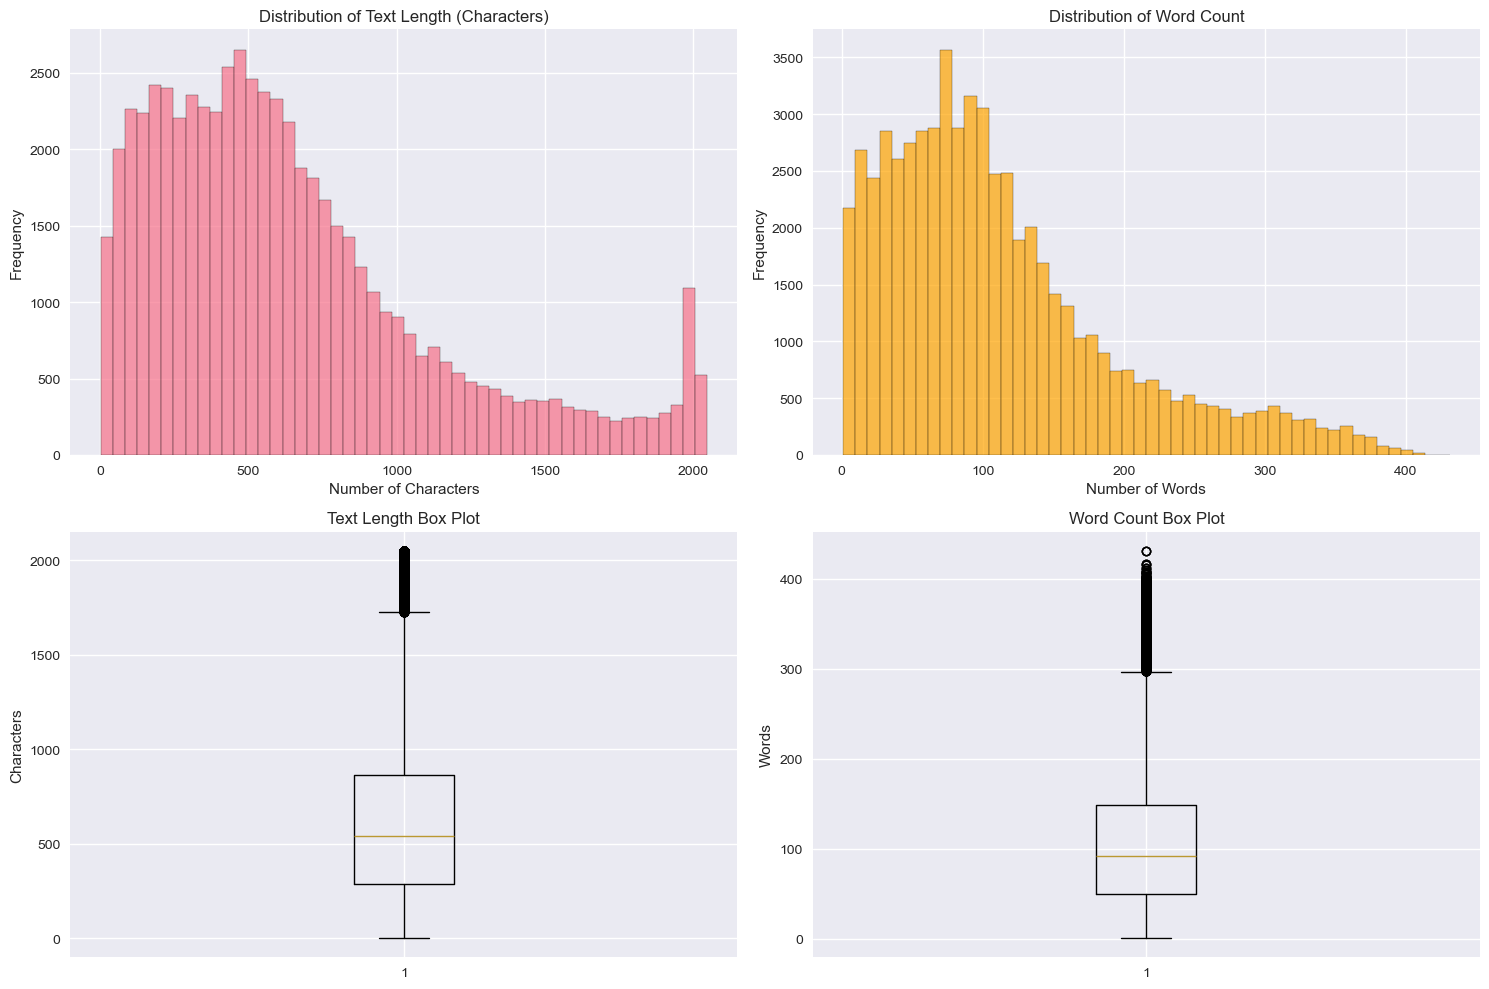

In [9]:
# Text Corpus Analysis - CMPLDESCR
print("="*60)
print("TEXT CORPUS ANALYSIS - CMPLDESCR")
print("="*60)

if 'CMPLDESCR' not in df.columns:
    print("CMPLDESCR column not found in dataset")
else:
    # Basic text statistics
    text_col = df['CMPLDESCR']
    non_null_texts = text_col.dropna()
    
    print(f"Total complaints: {len(df)}")
    print(f"Complaints with descriptions: {len(non_null_texts)}")
    print(f"Missing descriptions: {len(df) - len(non_null_texts)}")
    print(f"Description completeness: {len(non_null_texts)/len(df)*100:.2f}%")
    
    if len(non_null_texts) > 0:
        # Text length analysis
        text_lengths = non_null_texts.str.len()
        print(f"\nText Length Statistics:")
        print(f"  Mean length: {text_lengths.mean():.1f} characters")
        print(f"  Median length: {text_lengths.median():.1f} characters")
        print(f"  Min length: {text_lengths.min()} characters")
        print(f"  Max length: {text_lengths.max()} characters")
        print(f"  Std deviation: {text_lengths.std():.1f} characters")
        
        # Word count analysis
        word_counts = non_null_texts.str.split().str.len()
        print(f"\nWord Count Statistics:")
        print(f"  Mean words: {word_counts.mean():.1f}")
        print(f"  Median words: {word_counts.median():.1f}")
        print(f"  Min words: {word_counts.min()}")
        print(f"  Max words: {word_counts.max()}")
        
        # Visualize text characteristics
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Character length distribution
        axes[0,0].hist(text_lengths, bins=50, alpha=0.7, edgecolor='black')
        axes[0,0].set_title('Distribution of Text Length (Characters)')
        axes[0,0].set_xlabel('Number of Characters')
        axes[0,0].set_ylabel('Frequency')
        
        # Word count distribution
        axes[0,1].hist(word_counts, bins=50, alpha=0.7, edgecolor='black', color='orange')
        axes[0,1].set_title('Distribution of Word Count')
        axes[0,1].set_xlabel('Number of Words')
        axes[0,1].set_ylabel('Frequency')
        
        # Box plot for text lengths
        axes[1,0].boxplot(text_lengths)
        axes[1,0].set_title('Text Length Box Plot')
        axes[1,0].set_ylabel('Characters')
        
        # Box plot for word counts
        axes[1,1].boxplot(word_counts)
        axes[1,1].set_title('Word Count Box Plot')
        axes[1,1].set_ylabel('Words')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No text descriptions available for analysis")



----------------------------------------
COMMON WORDS ANALYSIS
----------------------------------------
Top 20 Most Common Words:
   1. vehicle         (78686 times)
   2. not             (67749 times)
   3. contact         (51397 times)
   4. car             (40821 times)
   5. engine          (30747 times)
   6. while           (29042 times)
   7. when            (26143 times)
   8. failure         (25249 times)
   9. there           (23243 times)
  10. driving         (22699 times)
  11. stated          (21618 times)
  12. recall          (21377 times)
  13. issue           (20764 times)
  14. from            (20500 times)
  15. dealer          (19071 times)
  16. warning         (18800 times)
  17. safety          (17389 times)
  18. after           (15916 times)
  19. manufacturer    (15791 times)
  20. light           (15774 times)


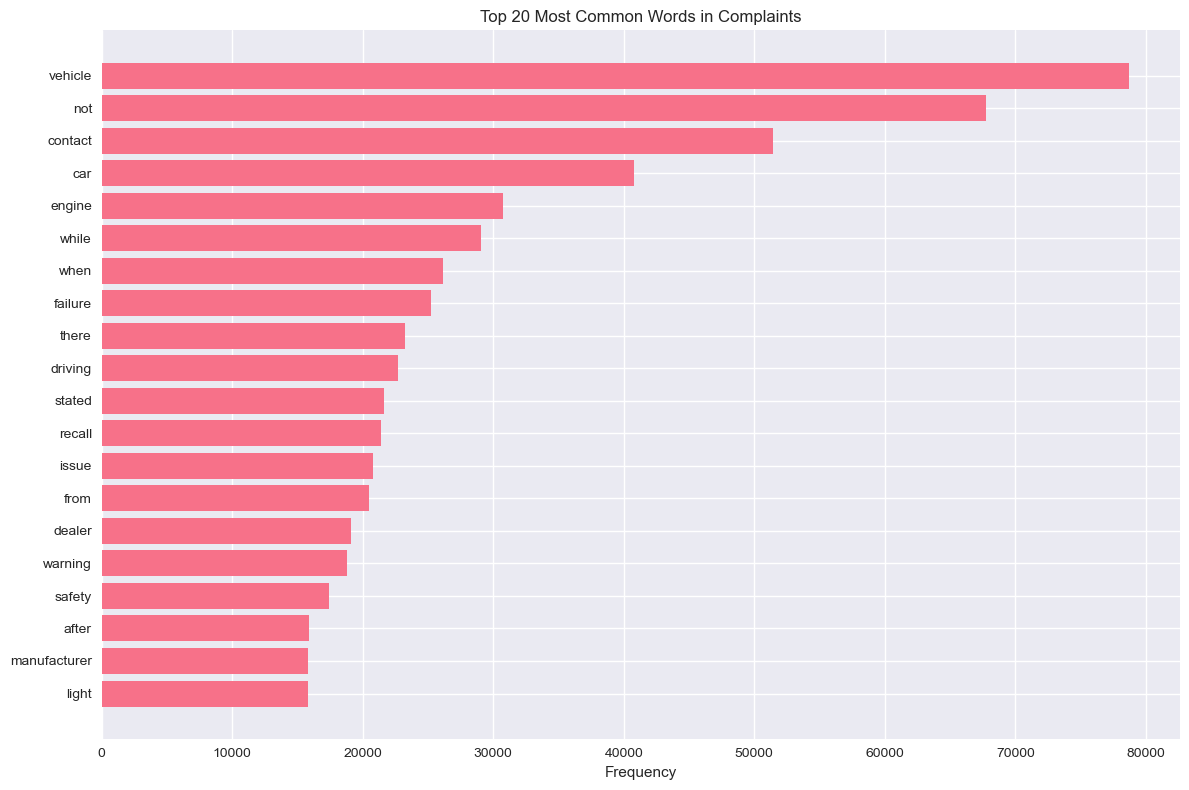

In [10]:
# Word Frequency Analysis
if 'CMPLDESCR' in df.columns and len(non_null_texts) > 0:
    print("\n" + "-"*40)
    print("COMMON WORDS ANALYSIS")
    print("-"*40)
    
    # Combine all texts
    all_text = ' '.join(non_null_texts.astype(str))
    
    # Basic word frequency (simple approach)
    words = all_text.lower().split()
    
    # Remove very short words and common stop words
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'can', 'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them'}
    
    # Filter words
    filtered_words = [word for word in words if len(word) > 2 and word not in stop_words]
    
    # Count word frequencies
    from collections import Counter
    word_freq = Counter(filtered_words)
    
    # Get top 20 most common words
    top_words = word_freq.most_common(20)
    
    print("Top 20 Most Common Words:")
    for i, (word, count) in enumerate(top_words, 1):
        print(f"  {i:2d}. {word:15s} ({count:4d} times)")
        
    # Visualize top words
    if top_words:
        words_list, counts_list = zip(*top_words)
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(words_list)), counts_list)
        plt.yticks(range(len(words_list)), words_list)
        plt.xlabel('Frequency')
        plt.title('Top 20 Most Common Words in Complaints')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()



----------------------------------------
TEXT PATTERNS BY VARIABLES
----------------------------------------


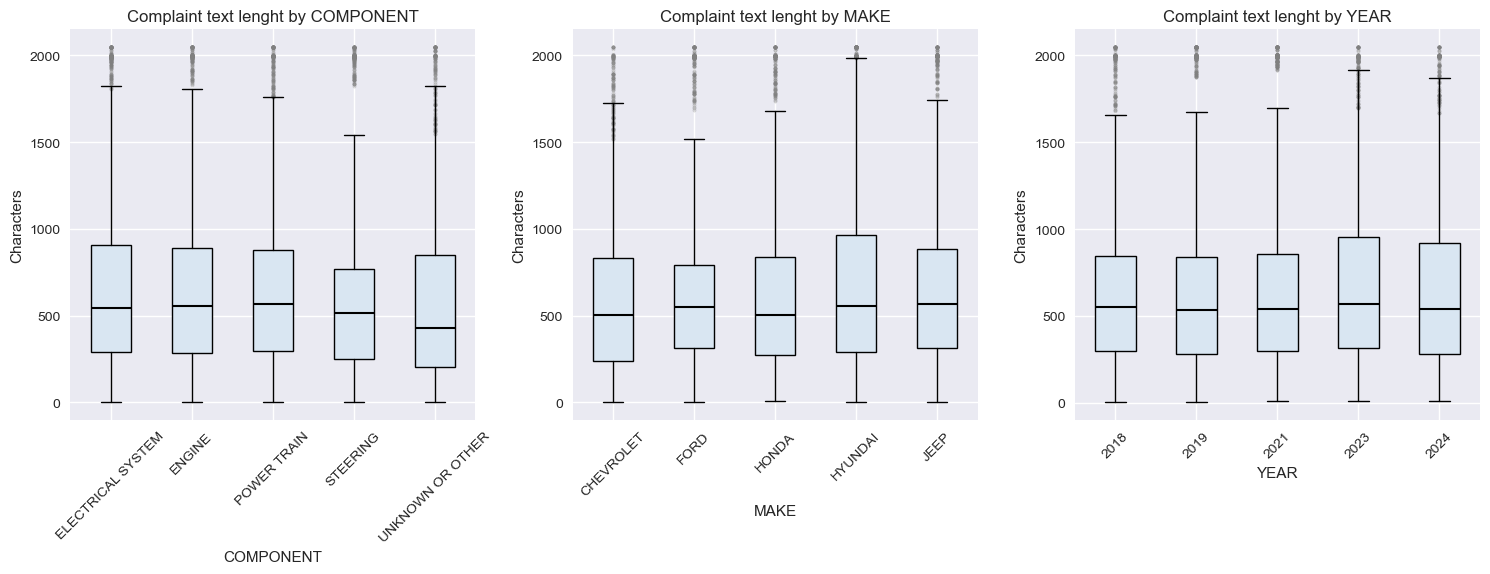


Example Complaints:

Complaint 1:
Length: 2048 characters
Text: My vehicle overheated on a drive home from work on an expressway doing approximately 72mph. Without any warning, my car flashed a notification that the engine temperature was too hot and I needed to stop safely. The car would not accelerate, in fact, it decelerated the next 4 miles before I could find a gas station to stop. The coolant reservoir was empty (which was full when I started my car) so ...

Complaint 2:
Length: 2048 characters
Text: On February 25, 2025, I took my 2023 Toyota Tundra VIN# [XXX]  to Stokes Toyota Beaufort, SC, for its 45,000-mile service. Just 300 meters after leaving the dealership, my truck caught fire, causing significant damage and putting my safety at risk.  I am sharing pictures of the incident and the warning messages I received on the dashboard. I was on my way back to the dealership when this happened....

Complaint 3:
Length: 2048 characters
Text: Date of purchase [XXX]. Date of inciden

In [11]:
TEXT_COL = next((c for c in ['CMPLDESCR','CDESCR','DESCRIPTION'] if c in df.columns), None)
if TEXT_COL is None:
    print("⚠️ No se encontró columna de texto (CMPLDESCR/CDESCR/DESCRIPTION).")
else:
    print("\n" + "-"*40)
    print("TEXT PATTERNS BY VARIABLES")
    print("-"*40)

    # Subconjunto con texto no nulo
    text_df = df[df[TEXT_COL].notna()].copy()

    # Asegurar string
    text_df[TEXT_COL] = text_df[TEXT_COL].astype(str)

    # Métricas de texto
    text_df['TEXT_LENGTH'] = text_df[TEXT_COL].str.len()
    text_df['WORD_COUNT']  = text_df[TEXT_COL].str.split().str.len()

    # Variables categóricas clave (si existen)
    key_vars = ['COMPONENT', 'MAKE', 'YEAR']
    available_vars = [v for v in key_vars if v in text_df.columns]

    if available_vars:
        fig, axes = plt.subplots(1, len(available_vars), figsize=(5*len(available_vars), 6))
        if len(available_vars) == 1:
            axes = [axes]

        for i, var in enumerate(available_vars):
            top = text_df[var].value_counts().head(5).index
            subset = text_df[text_df[var].isin(top)]

            subset.boxplot(
                column='TEXT_LENGTH', by=var, ax=axes[i],
                showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='#d9e6f2'),
                medianprops=dict(color='black', linewidth=1.5),
                whiskerprops=dict(linewidth=1), capprops=dict(linewidth=1)
    )

            # Añadir “algunos” outliers por categoría (p. ej. 150 puntos máximo)
            for cat in top:
                y = subset.loc[subset[var] == cat, 'TEXT_LENGTH'].values
                q1, q3 = np.percentile(y, [25, 75])
                iqr = q3 - q1
                out = y[(y < q1 - 1.5*iqr) | (y > q3 + 1.5*iqr)]
                if len(out) > 0:
                    samp = np.random.choice(out, size=min(150, len(out)), replace=False)
                    x = np.full_like(samp, fill_value=list(top).index(cat)+1, dtype=float)
                    axes[i].scatter(x, samp, s=6, alpha=0.25, c='gray')  # puntos suaves

            axes[i].set_title(f'Complaint text lenght by {var}')
            axes[i].set_xlabel(var); axes[i].set_ylabel('Characters')
            axes[i].tick_params(axis='x', rotation=45)

        # Quita el suptitle automático de pandas
        plt.suptitle('')
        plt.tight_layout()
        plt.show()
    else:
        print("No hay variables categóricas disponibles entre MAKE/COMPONENT/STATE para graficar.")

    # --- Ejemplos de quejas ---
    print("\nExample Complaints:")
    print("="*50)

    # Opción de los top 3 textos más largos
    examples = text_df.sort_values('TEXT_LENGTH', ascending=False)[TEXT_COL].head(3)

    # Opción de textos aleatorios
    #examples = text_df[TEXT_COL].sample(min(3, len(text_df)), random_state=42)

    for i, txt in enumerate(examples, 1):
        preview = txt[:400] + ("..." if len(txt) > 400 else "")
        print(f"\nComplaint {i}:")
        print(f"Length: {len(txt)} characters")
        print(f"Text: {preview}")

In [ ]:


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    
    # Sustituye signos de puntuación por espacios
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    
    # Elimina dobles espacios
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokeniza
    words = text.split()
    
    # Filtra stopwords pero conserva números o tokens con números dentro (como p0301)
    words = [
        lemmatizer.lemmatize(w) 
        for w in words 
        if (w not in stop_words) and (len(w) > 2 or w.isdigit())
    ]
    
    return " ".join(words)
df['CLEAN_TEXT'] = df['CMPLDESCR'].apply(clean_text)

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

TEXT_COL = next((c for c in ['CLEAN_TEXT','CMPLDESCR','CDESCR','DESCRIPTION'] if c in df.columns), None)
assert TEXT_COL is not None, "No se encontró columna de texto."

def clean_text_keep_nums(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)   # letras, números y espacios
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words
             if (w not in stop_words) and (len(w) > 2 or w.isdigit())]
    return " ".join(words)

if TEXT_COL != 'CLEAN_TEXT':
    df['CLEAN_TEXT'] = df[TEXT_COL].fillna("").apply(clean_text_keep_nums)
else:
    df['CLEAN_TEXT'] = df['CLEAN_TEXT'].fillna("")

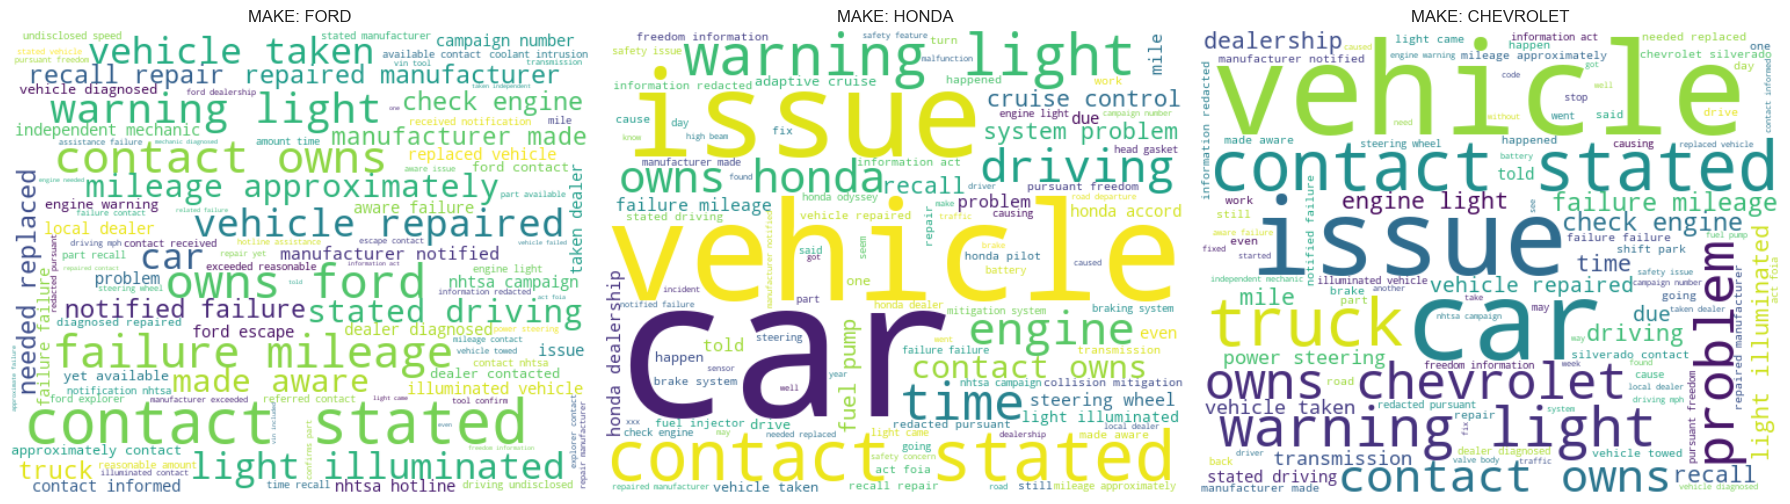

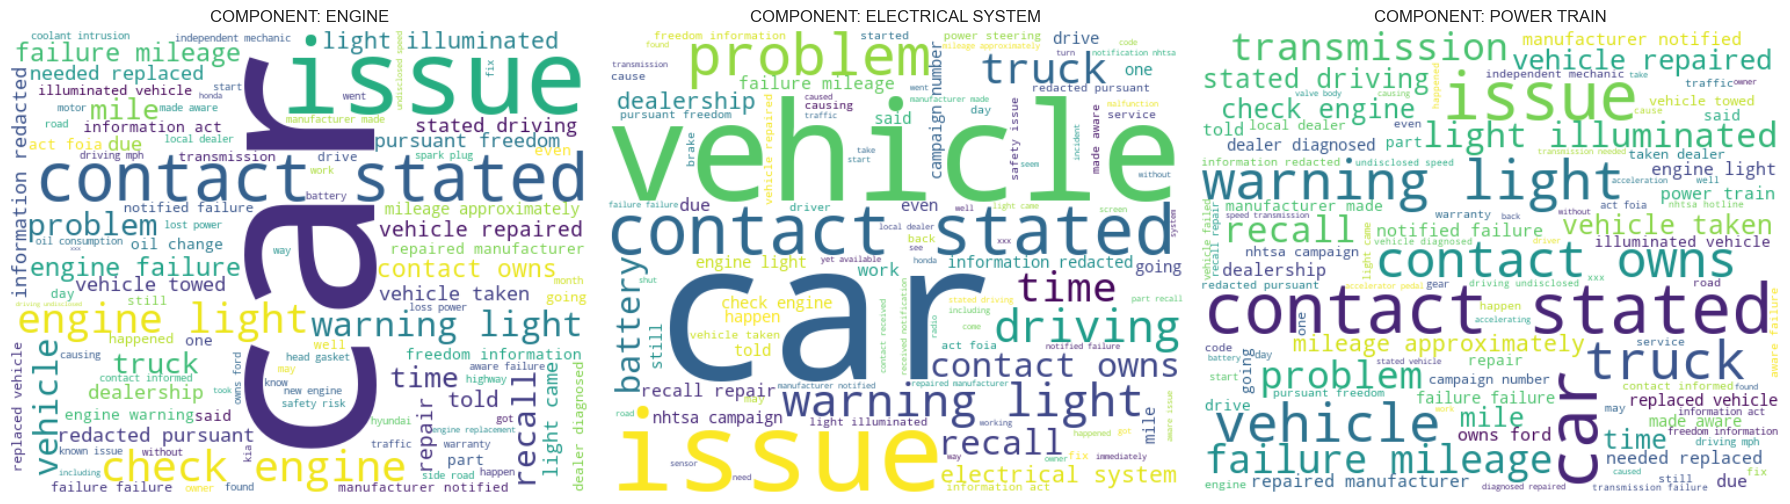

In [14]:
key_vars = ['MAKE', 'COMPONENT']
for var in key_vars:
    if var in df.columns:
        top_cats = df[var].value_counts().head(3).index
        fig, axes = plt.subplots(1, len(top_cats), figsize=(18, 6))
        for i, cat in enumerate(top_cats):
            text = " ".join(df[df[var] == cat]['CLEAN_TEXT'].dropna().tolist())
            wc = WordCloud(width=500, height=400, background_color='white', max_words=100).generate(text)
            axes[i].imshow(wc, interpolation='bilinear')
            axes[i].axis('off')
            axes[i].set_title(f"{var}: {cat}")
        plt.tight_layout()
        plt.show()


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None, ngram_range=(2,2)):
    vec = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

bigrams = get_top_ngrams(df['CLEAN_TEXT'], n=20, ngram_range=(2,2))
print("\nTop 20 Bigrams:")
for phrase, freq in bigrams:
    print(f"{phrase}: {freq}")



Top 20 Bigrams:
contact stated: 19152
warning light: 11313
contact owns: 10383
failure mileage: 9573
light illuminated: 6729
vehicle repaired: 6346
check engine: 6194
vehicle taken: 6026
stated driving: 5458
mileage approximately: 5433
made aware: 5379
recall repair: 5362
engine light: 4862
repaired manufacturer: 4829
notified failure: 4704
manufacturer made: 4688
campaign number: 4615
nhtsa campaign: 4535
manufacturer notified: 4290
needed replaced: 4181


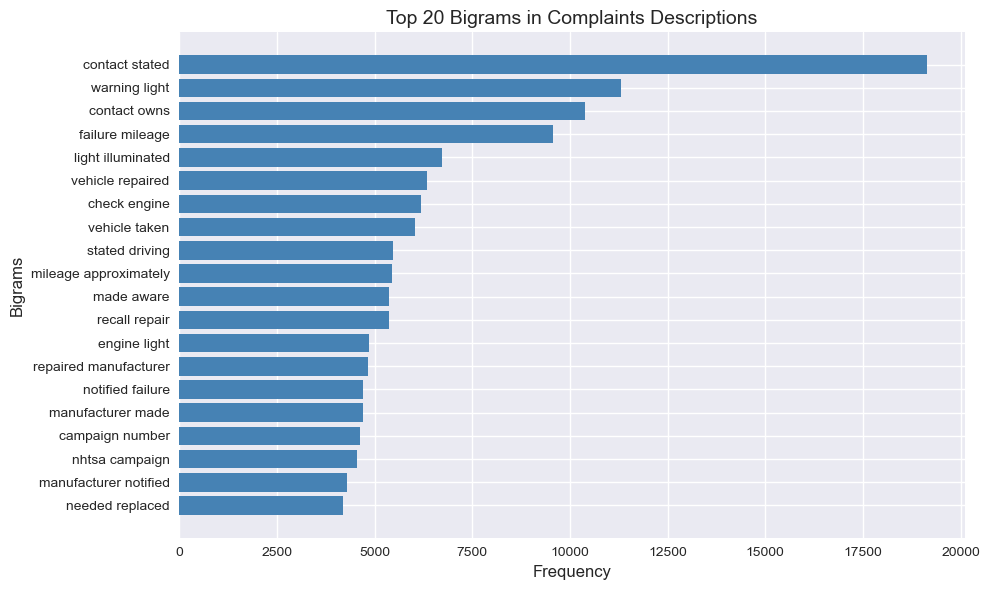

In [16]:
# Convertir los bigramas en dos listas: frases y frecuencias
bigrams_phrases = [phrase for phrase, freq in bigrams]
bigrams_freqs = [freq for phrase, freq in bigrams]

# Crear la figura
plt.figure(figsize=(10, 6))
plt.barh(bigrams_phrases[::-1], bigrams_freqs[::-1], color='steelblue')
plt.title("Top 20 Bigrams in Complaints Descriptions", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Bigrams", fontsize=12)
plt.tight_layout()
plt.show()

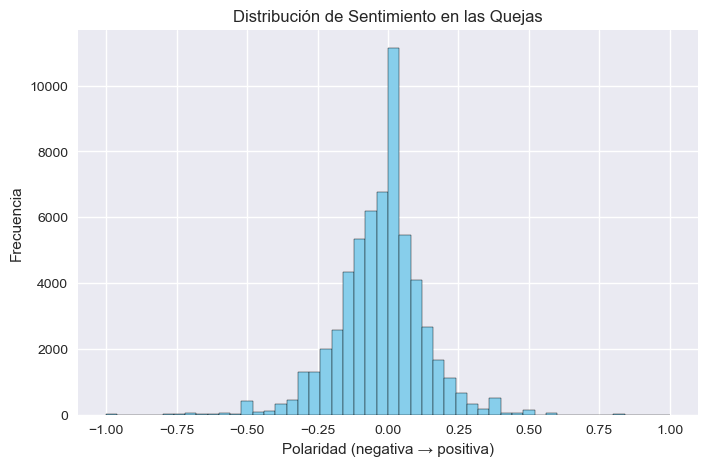

Promedio de sentimiento: -0.025
                                               CMPLDESCR  SENTIMENT
33674  Timeline of Events: ~March 2024  Ongoing: In...   0.027206
61609  My seat doesnt detect if passanger is in seat...   0.200000
45502  The contact owned a 2020 Chevrolet Silverado 1...  -0.042949
53634  Fuel Lines and Connections / Fuel Tank Band / ...   0.085253
12984  On a normal trip to work the dash light lit up...   0.048448


In [17]:
from textblob import TextBlob

df['SENTIMENT'] = df['CMPLDESCR'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8,5))
df['SENTIMENT'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribución de Sentimiento en las Quejas")
plt.xlabel("Polaridad (negativa → positiva)")
plt.ylabel("Frecuencia")
plt.show()

print(f"Promedio de sentimiento: {df['SENTIMENT'].mean():.3f}")
print(df[['CMPLDESCR','SENTIMENT']].sample(5))

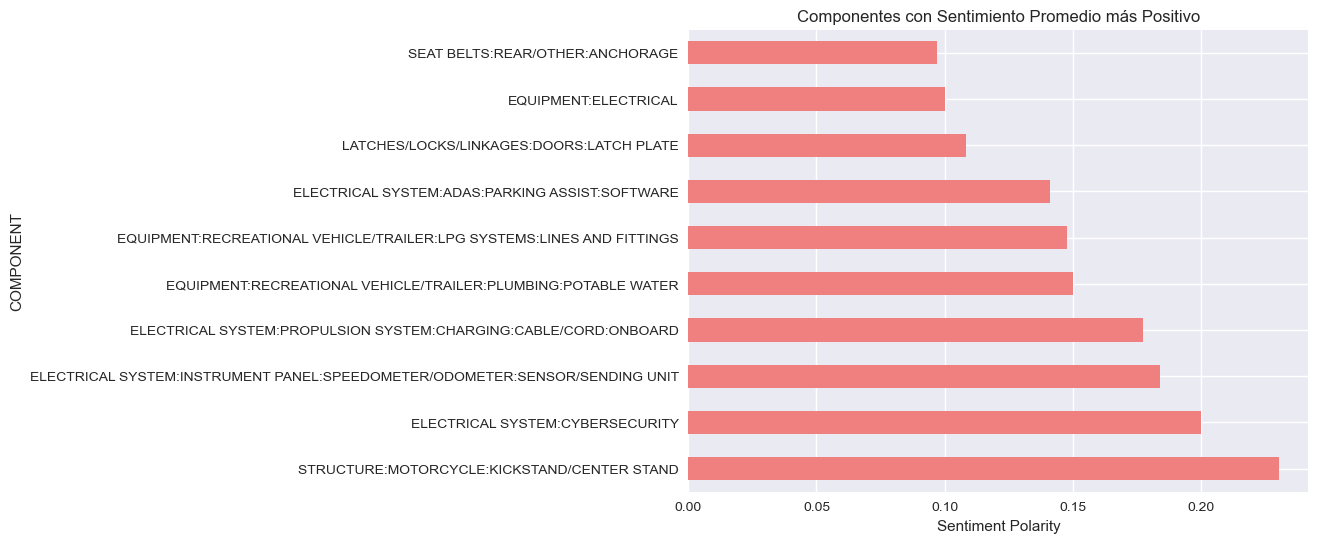

In [59]:
if 'COMPONENT' in df.columns:
    avg_sentiment = df.groupby('COMPONENT')['SENTIMENT'].mean().sort_values(ascending=False).head(10)
    avg_sentiment.plot(kind='barh', figsize=(8,6), color='lightcoral')
    plt.title("Componentes con Sentimiento Promedio más Positivo")
    plt.xlabel("Sentiment Polarity")
    plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

corpus = df['CLEAN_TEXT'].tolist()

vectorizer = CountVectorizer(
    max_df=0.8,         # ignora términos demasiado comunes
    min_df=10,          # términos presentes al menos en 10 documentos
    ngram_range=(1,2),  # unigrams + bigrams
    stop_words='english'
)
X = vectorizer.fit_transform(corpus)

n_topics = 10
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    learning_method='online',
    random_state=42,
    max_iter=10,
    evaluate_every=0
)
lda_model.fit(X)

# Mostrar top palabras por tema
import numpy as np
feature_names = np.array(vectorizer.get_feature_names_out())

def print_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        top_idx = topic.argsort()[-n_top_words:]
        print(f"\nTopic {idx+1}: ", list(feature_names[top_idx]))

print_topics(lda_model, feature_names, n_top_words=10)


Topic 1:  ['left', 'right', 'stop', 'wheel', 'driving', 'steering', 'issue', 'vehicle', 'time', 'turn']

Topic 2:  ['happened', 'warning', 'went', 'started', 'parking', 'battery', 'time', 'camera', 'driving', 'car']

Topic 3:  ['tire', 'control', 'driving', 'gear', 'speed', 'steering', 'truck', 'vehicle', 'power', 'transmission']

Topic 4:  ['light', 'check', 'failure', 'check engine', 'engine light', 'fuel', 'door', 'vehicle', 'oil', 'engine']

Topic 5:  ['pursuant', 'issue', 'act', 'defect', 'risk', 'failure', 'xxx', 'information', 'safety', 'vehicle']

Topic 6:  ['cruise', 'problem', 'stop', 'control', 'collision', 'braking', 'vehicle', 'warning', 'light', 'brake']

Topic 7:  ['repair', 'dealer', 'told', 'mile', 'ford', 'problem', 'car', 'dealership', 'recall', 'issue']

Topic 8:  ['nhtsa campaign', 'nhtsa', 'number', 'campaign', 'available', 'manufacturer', 'recall repair', 'repair', 'recall', 'contact']

Topic 9:  ['failure mileage', 'manufacturer', 'repaired', 'mileage', 'dealer

In [23]:
import pyLDAvis
import inspect

# Datos base desde tu pipeline:
# - lda_model: instancia de sklearn.decomposition.LatentDirichletAllocation ya ajustada
# - X: matriz documento-término de CountVectorizer
# - vectorizer: CountVectorizer ajustado

def prepare_pyldavis_panel(lda_model, X, vectorizer):
    """
    Devuelve un panel de pyLDAvis, independiente de la versión instalada.
    Soporta:
      - API vieja: pyLDAvis.sklearn.prepare(lda_model, X, vectorizer)
      - API antigua de lda_model.prepare(lda_model, X, vectorizer)
      - API nueva (>=3.4): pyLDAvis.lda_model.prepare(topic_term_dists=..., doc_topic_dists=..., ...)
    """
    # 1) Intentar wrapper sklearn (presente en versiones viejas)
    try:
        import pyLDAvis.sklearn as pld_sklearn
        return pld_sklearn.prepare(lda_model, X, vectorizer, mds='tsne')
    except Exception:
        pass

    # 2) Intentar API de lda_model con firma antigua (lda_model, dtm, vectorizer)
    try:
        import pyLDAvis.lda_model as plda
        sig = inspect.signature(plda.prepare)
        params = list(sig.parameters.keys())
        if params[:3] == ['lda_model', 'dtm', 'vectorizer']:
            # Firma antigua
            return plda.prepare(lda_model, X, vectorizer, mds='tsne')
    except Exception:
        pass

    # 3) API nueva (>=3.4): requiere distribuciones explícitas
    import pyLDAvis.lda_model as plda

    topic_term = lda_model.components_.astype(float)
    topic_term = topic_term / topic_term.sum(axis=1, keepdims=True)

    doc_topic = lda_model.transform(X)
    doc_lengths = X.sum(axis=1).A1
    vocab = vectorizer.get_feature_names_out()
    term_frequency = X.sum(axis=0).A1

    return plda.prepare(
        topic_term_dists=topic_term,
        doc_topic_dists=doc_topic,
        doc_lengths=doc_lengths,
        vocab=vocab,
        term_frequency=term_frequency,
        sort_topics=False
    )

# Usar el panel
pyLDAvis.enable_notebook()
panel = prepare_pyldavis_panel(lda_model, X, vectorizer)
panel


# Guardar a HTML para compartir
# pyLDAvis.save_html(panel, 'lda_topics.html')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6       4.051145  25.397762       1        1  16.652215
8      34.509892  -4.401616       2        1  16.417020
4      -1.622036 -27.337545       3        1  12.162105
1      15.241921   7.535549       4        1  11.313176
9     -17.095890  14.763030       5        1   9.983797
2     -19.491568 -12.093328       6        1   8.422816
3      30.425449  20.653234       7        1   8.302507
0      -3.030980   0.021434       8        1   6.862317
5      12.596196 -12.045595       9        1   5.580082
7      25.336721 -27.608757      10        1   4.303965, topic_info=                 Term          Freq         Total Category  logprob  loglift
9767          contact  52723.000000  52723.000000  Default  30.0000  30.0000
6680              car  49014.000000  49014.000000  Default  29.0000  29.0000
14842          engine  36794.000000  36794.000000  Default  28.0000  28.0000
5615            brake  16988.000000  16988.000000  Default  27.0000  27.0000
32284          recall  30226.000000  30226.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
38816          stated   2867.326584  21594.030915  Topic10  -4.3170   1.1266
40761            time   2790.674938  21875.455411  Topic10  -4.3441   1.0866
9921   contact stated   2627.699078  19164.438554  Topic10  -4.4043   1.1587
11504          dealer   2590.192876  25914.087515  Topic10  -4.4187   0.8426
16277         failure   2251.267844  42667.568646  Topic10  -4.5589   0.2037

[650 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
0          1  0.998638               00
10         1  0.242974              000
10         2  0.532156              000
10         6  0.045052              000
10         7  0.179747              000
...      ...       ...              ...
46608      3  0.998649  xxx information
46674      3  0.998977          xxx xxx
46683      1  0.731519             year
46683      4  0.010891             year
46683      5  0.257534             year

[1318 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 5, 2, 10, 3, 4, 1, 6, 8])

In [25]:
panel, used_api = prepare_pyldavis_panel(lda_model, X, vectorizer), None
# si ajustaste la función para devolver (panel, "sklearn"/"old"/"new")
print("pyLDAvis API usada:", used_api)

pyLDAvis API usada: None


In [27]:
pyLDAvis.save_html(panel, "lda_topics.html")
print("LDA panel guardado en results/figures/lda_topics.html")

LDA panel guardado en results/figures/lda_topics.html


In [28]:
doc_topic = lda_model.transform(X)              # matriz docs × topics
df['TOPIC_ID'] = doc_topic.argmax(axis=1) + 1   # 1..n_topics
df['TOPIC_SCORE'] = doc_topic.max(axis=1)

# Ejemplos: distribución por tema y cruce con COMPONENT
topic_counts = df['TOPIC_ID'].value_counts().sort_index()
display(topic_counts)

if 'COMPONENT' in df.columns:
    cross = df.groupby(['TOPIC_ID','COMPONENT']).size().reset_index(name='n')
    display(cross.sort_values('n', ascending=False).head(20))


TOPIC_ID
1      4027
2      8887
3      4627
4      4002
5      6228
6      2880
7     12983
8      2200
9      9265
10     4449
Name: count, dtype: int64

,TOPIC_ID,COMPONENT,n
377,7,ENGINE,2970
150,4,ENGINE,2033
412,7,POWER TRAIN,1764
46,2,ELECTRICAL SYSTEM,1717
367,7,ELECTRICAL SYSTEM,1657
442,7,UNKNOWN OR OTHER,1615
122,3,POWER TRAIN,1611
557,9,ENGINE,1377
558,9,ENGINE AND ENGINE COOLING,1316
658,9,POWER TRAIN,1306


In [29]:
import spacy, pandas as pd
nlp = spacy.load("en_core_web_sm")

# Para rendimiento, procesa una muestra (ajusta n_docs según tu RAM/tiempo)
n_docs = min(5000, len(df))
sample_texts = df['CMPLDESCR'].dropna().astype(str).head(n_docs).tolist()

ents = []
for i, doc in enumerate(nlp.pipe(sample_texts, batch_size=64, disable=["parser","tagger"])):
    for e in doc.ents:
        ents.append((i, e.text, e.label_))

ner_df = pd.DataFrame(ents, columns=['doc_idx','entity','label'])
display(ner_df.head())

# Top entidades por tipo
top_by_label = (ner_df.groupby(['label','entity']).size()
                       .reset_index(name='n')
                       .sort_values(['label','n'], ascending=[True, False]))
display(top_by_label.groupby('label').head(10))


,doc_idx,entity,label
0,5,2 years,DATE
1,5,more than half,CARDINAL
2,6,FOIA,ORG
3,6,5,CARDINAL
4,6,552(B)(6,CARDINAL


,label,entity,n
470,CARDINAL,5,338
503,CARDINAL,552(B)(6,274
1043,CARDINAL,two,210
221,CARDINAL,2,188
371,CARDINAL,3,183
...,...,...,...
6259,WORK_OF_ART,Brake is Not On,3
6266,WORK_OF_ART,Check Brake System,3
6268,WORK_OF_ART,Collision Assist Unavailable,3
6269,WORK_OF_ART,Complete Outer Brake Failure,3
